In [1]:
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from astropy.stats import mad_std
import numpy as np
import os
import re
from astropy.io import fits
import glob
from astropy.table import Table
from matplotlib.backends.backend_pdf import PdfPages

In [11]:
def implots( list=None, xrange=60., outname=None, absvalue=False, clevs=None, slice=None, nx=5, ny=5, figtitle=None):

    pages = int(np.ceil(float(len(list)) / (nx*ny)))
    if outname is not None:
        pp = PdfPages(outname)

    for j, line in enumerate(['co']):
        for num in range(0,pages):
            aa = nx*ny*num
            bb = nx*ny+aa
            thispage = list[aa:bb]
            fig = plt.figure(figsize=(20,14))
            if figtitle is not None:
                fig.suptitle(figtitle)
            for i in range(0,len(thispage)):
                infile = thispage[i]
                #gname = os.path.basename(infile).split('.')[0]
                fname = os.path.basename(infile)
                gname = re.search('NGC\d{3,5}|IC\d{3,5}|ARP\d{3,5}|UGC\d{3,5}|NED\d{2}',fname)
                #print("Plotting", gname)
                if os.path.exists(infile):
                    if slice is None:
                        tempim = fits.getdata(infile)
                    else:
                        tempim = fits.getdata(infile)[slice]
                    temphd = fits.getheader(infile)
                    xctr = temphd['CRPIX1']
                    yctr = temphd['CRPIX2']
                else:
                    tempim = np.zeros((int(2*xrange+1),int(2*xrange+1)))
                    xctr = xrange
                    yctr = xrange
                ax = plt.subplot(ny,nx,i+1)
                xran = [xctr-xrange, xctr+xrange]
                yran = [yctr-xrange, yctr+xrange]
                ax.set_xlim(xran)
                ax.set_ylim(yran)
#                 row = len(gals) / nx
#                 if i % nx != 0:
#                     ax.axis["left"].toggle(all=False, ticks=True)
#                 if i < nx*(row-1):
#                     ax.axis["bottom"].toggle(all=False, ticks=True)
                #ax.imshow(tempim, cmap='jet', norm=LogNorm)
                if absvalue:
                    tempim = abs(tempim)
                
                #divnorm = colors.TwoSlopeNorm(vmin=1,vcenter=6,vmax=100)
                divnorm = colors.SymLogNorm(linthresh=1,vmin=1,vmax=100,base=10)
                
                colormap = ax.imshow(tempim, cmap='coolwarm_r', norm=divnorm)
                imax = np.nanmax(tempim)
                if clevs is not None:
                    #plt.contour(tempim, levels=[0.2*imax, 0.5*imax], colors='k')
                    plt.contour(tempim, levels=clevs*imax, colors='k')
                #ax.set_ticklabel_type("arcsec", "arcsec", center_pixel=[xctr,yctr])
                #ax.set_default_label(None, None)  
                #ax.xaxis.set_ticklabels([])
                #ax.yaxis.set_ticklabels([])
                ax.xaxis.set_ticks([])
                ax.yaxis.set_ticks([])
                
                plt.colorbar(colormap,orientation='horizontal',shrink=.85,pad=0.05)
                plt.text(0.04,0.07,gname.group(0),ha='left',va='center',transform=ax.transAxes,
                   bbox=dict(facecolor='white', edgecolor='none', pad=1))
            fig.subplots_adjust(hspace=0.05)
            fig.subplots_adjust(wspace=0.05)
            if outname is not None:
                pp.savefig(bbox_inches = 'tight', pad_inches=0.1)
                plt.close()
            else:
                plt.show()
        if outname is not None:
            pp.close()
    return


In [11]:
def implots( list=None, xrange=60., outname=None, absvalue=False, clevs=None, slice=None, nx=5, ny=5, figtitle=None):
    pages = int(np.ceil(float(len(list)) / (nx*ny)))
    if outname is not None:
        pp = PdfPages(outname)
    for j, line in enumerate(['co']):
        for num in range(0,pages):
            aa = nx*ny*num
            bb = nx*ny+aa
            thispage = list[aa:bb]
            fig = plt.figure(figsize=(20,14))
            for i in range(0,len(thispage)):
                infile = thispage[i]
                if os.path.exists(infile):
                    tempim = fits.getdata(infile)
                    temphd = fits.getheader(infile)
                    xctr = temphd['CRPIX1']
                    yctr = temphd['CRPIX2']
                else:
                    tempim = np.zeros((int(2*xrange+1),int(2*xrange+1)))
                    xctr = xrange
                    yctr = xrange
                ax = plt.subplot(ny,nx,i+1)
                xran = [xctr-xrange, xctr+xrange]
                yran = [yctr-xrange, yctr+xrange]
                ax.set_xlim(xran)
                ax.set_ylim(yran)
                if absvalue:
                    tempim = abs(tempim)
                colormap = ax.imshow(tempim, cmap='coolwarm_r')
                imax = np.nanmax(tempim)
                if clevs is not None:
                    plt.contour(tempim, levels=clevs*imax, colors='k')
                ax.xaxis.set_ticks([])
                ax.yaxis.set_ticks([])
            fig.subplots_adjust(hspace=0.05)
            fig.subplots_adjust(wspace=0.05)
            if outname is not None:
                pp.savefig(bbox_inches = 'tight', pad_inches=0.1)
                plt.close()
            else:
                plt.show()
        if outname is not None:
            pp.close()
    return

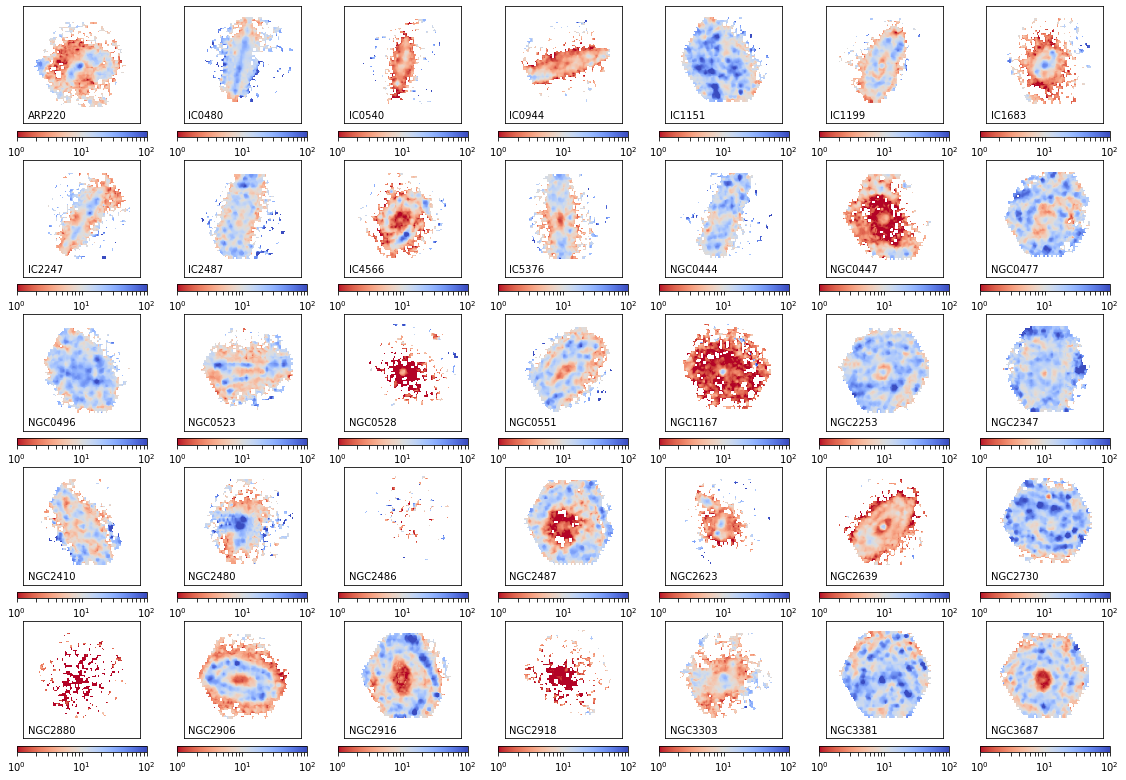

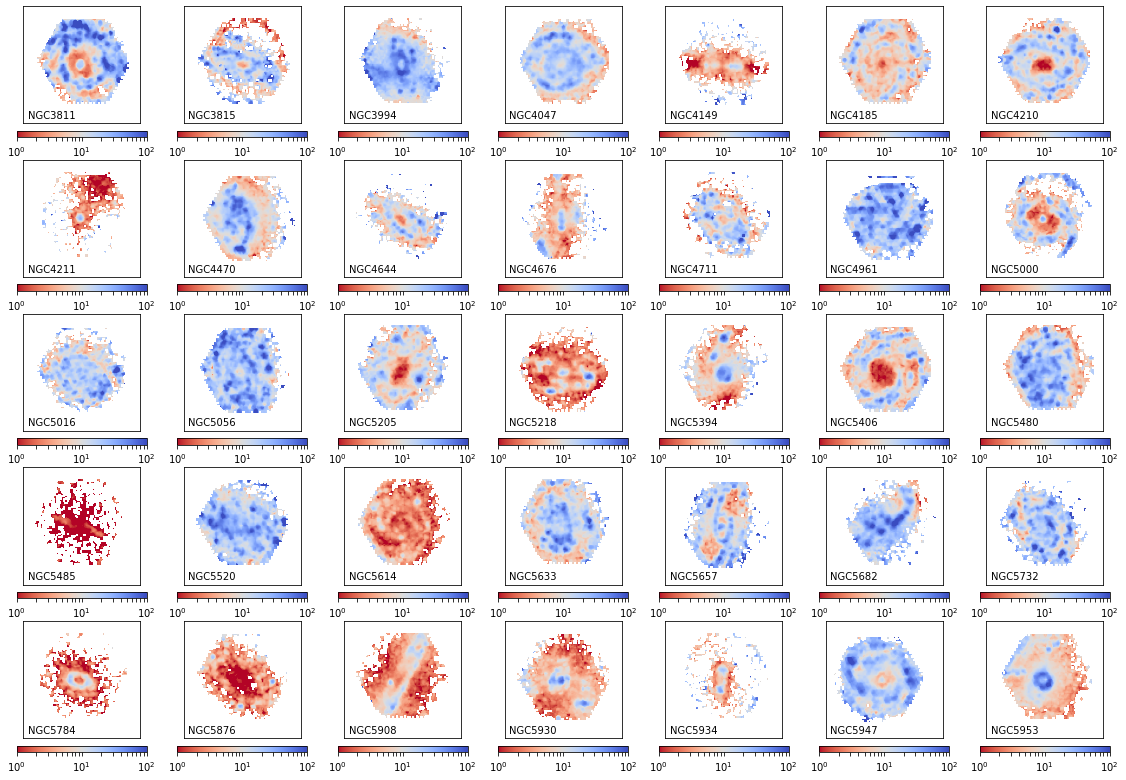

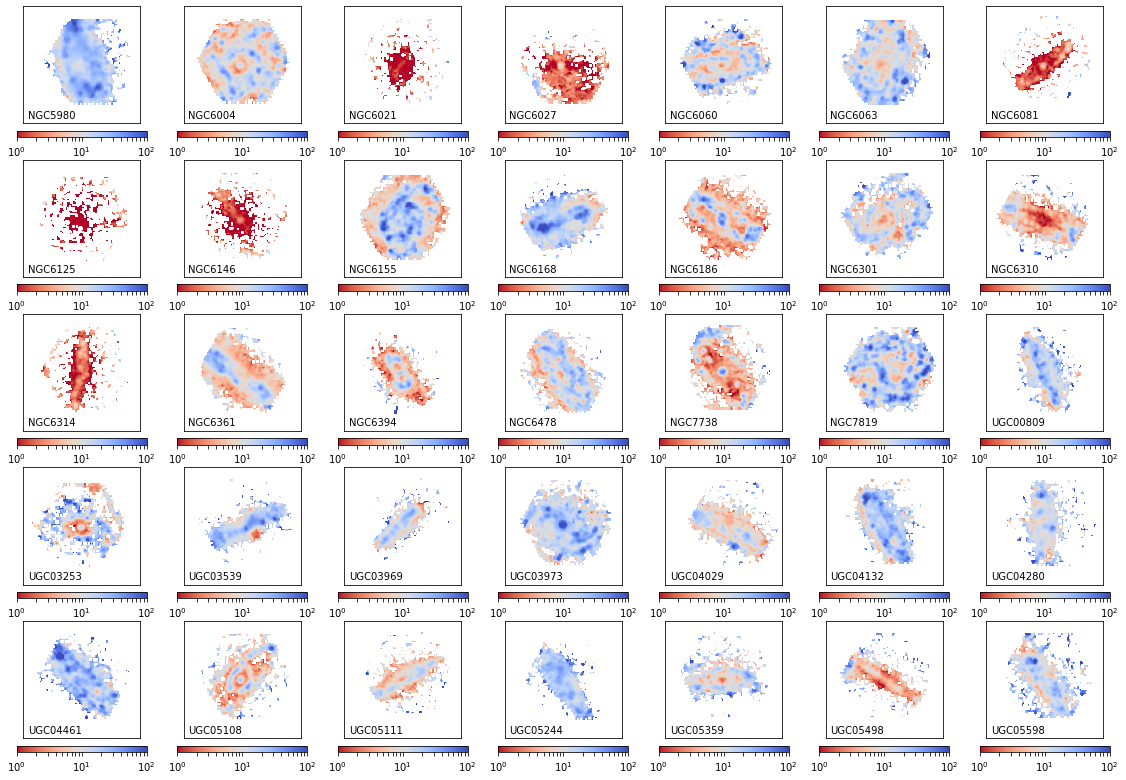

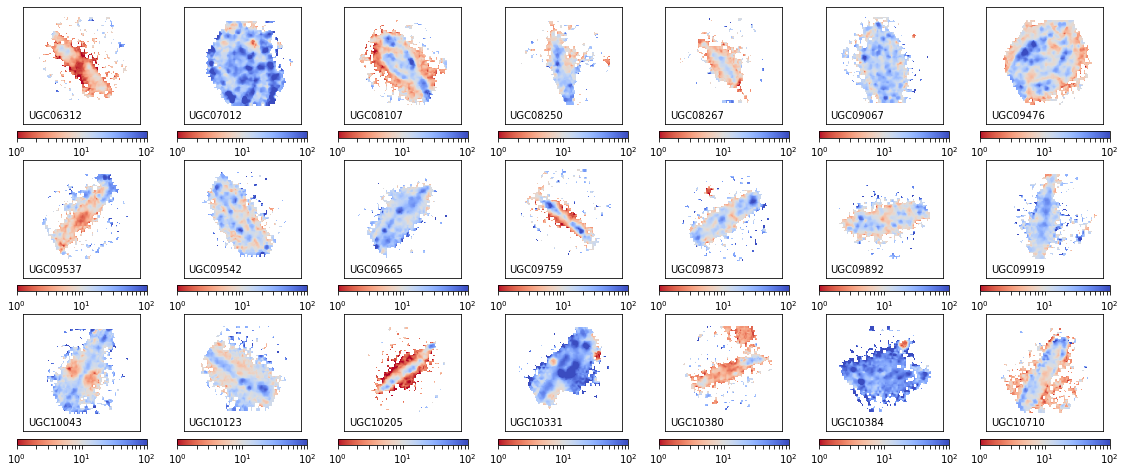

In [5]:
fitspath = '../edge/califa/DR3/pipe3d_native/flux_elines/halpha/'
filelist = glob.glob(fitspath+'*.haew_felines.fits.gz')
clevs = [0.2,0.5]
implots(list=filelist,xrange=50,absvalue=True,nx=7,ny=5)

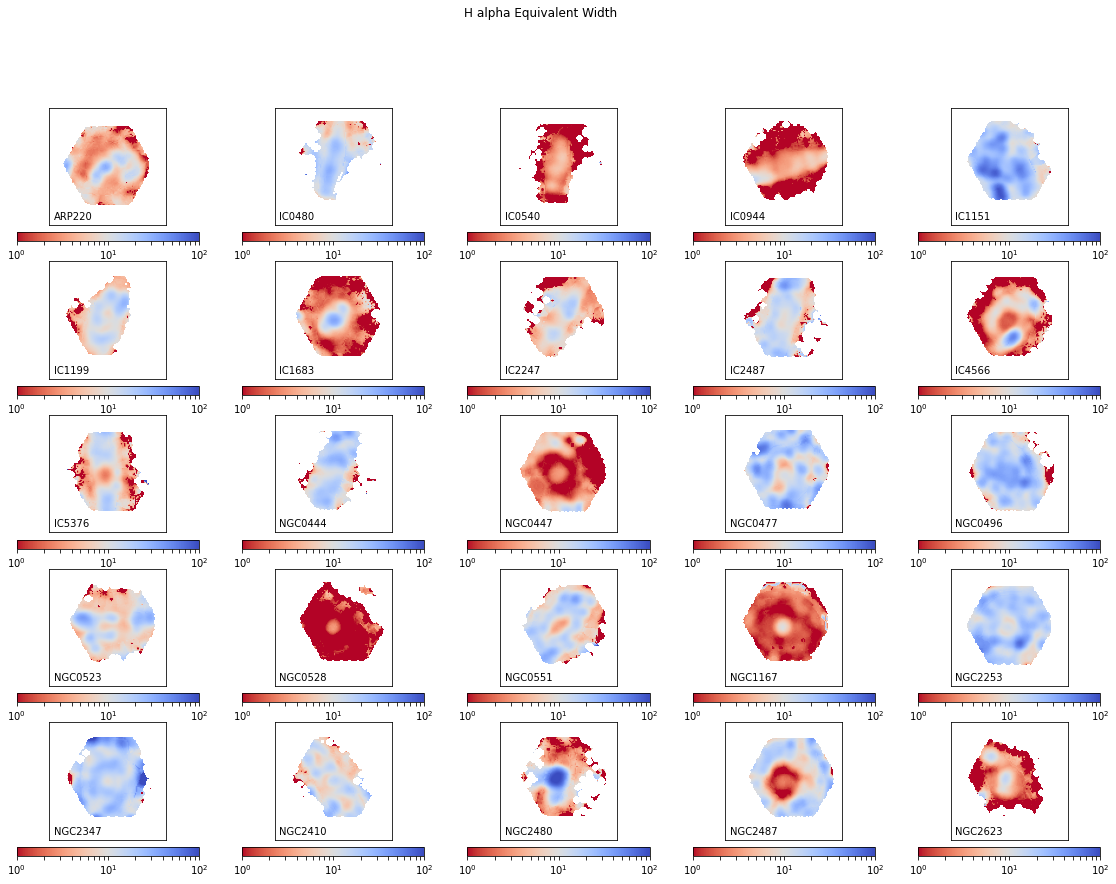

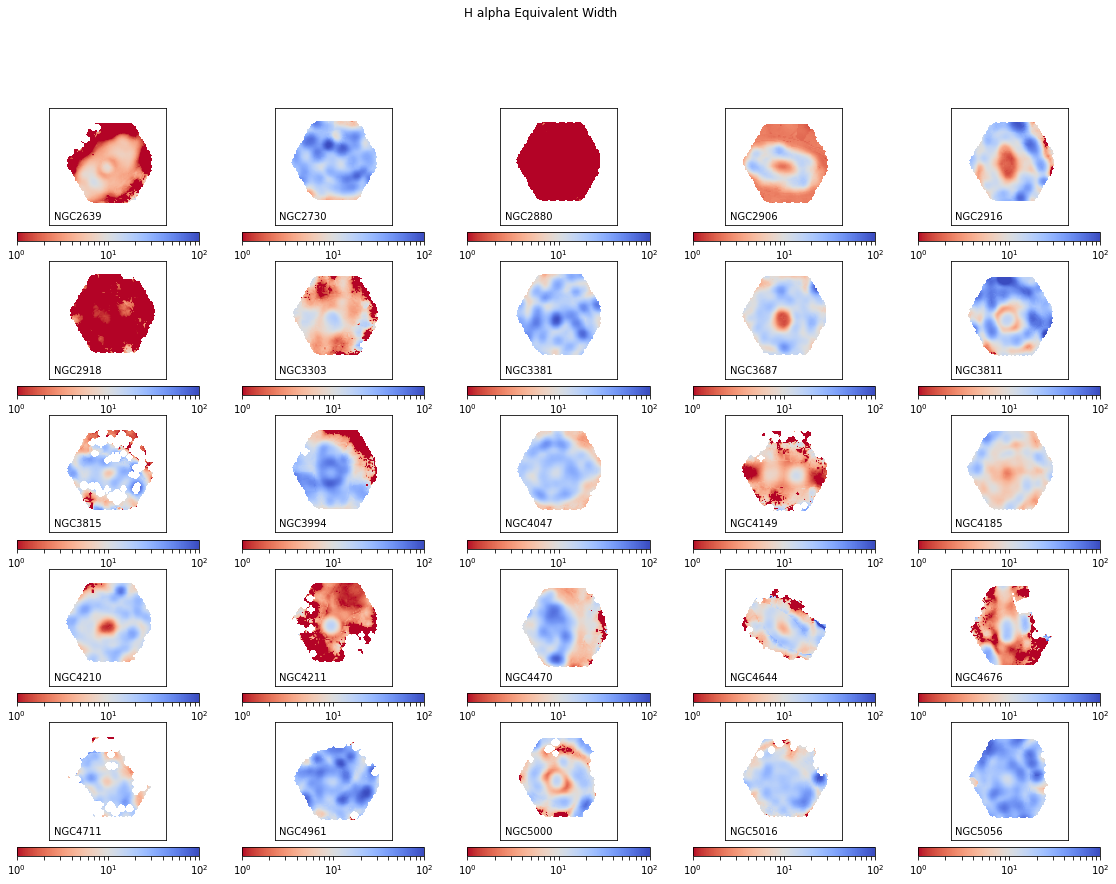

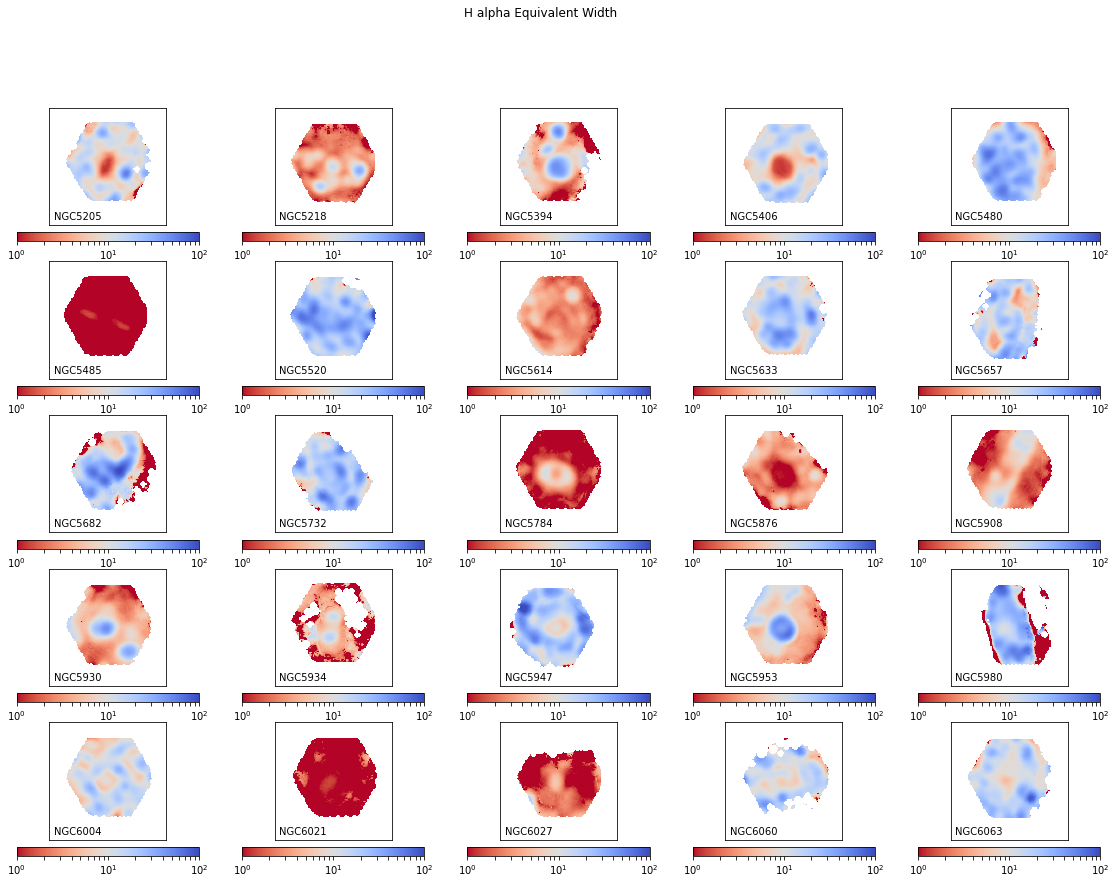

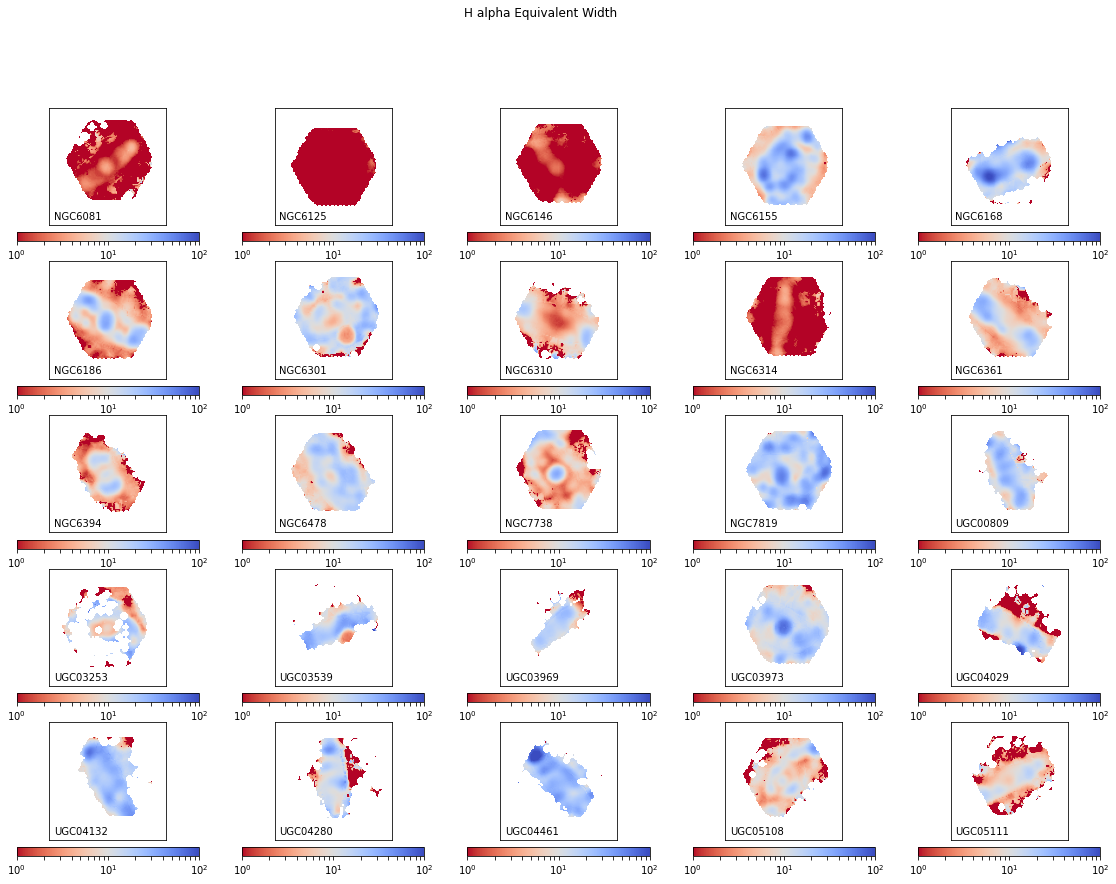

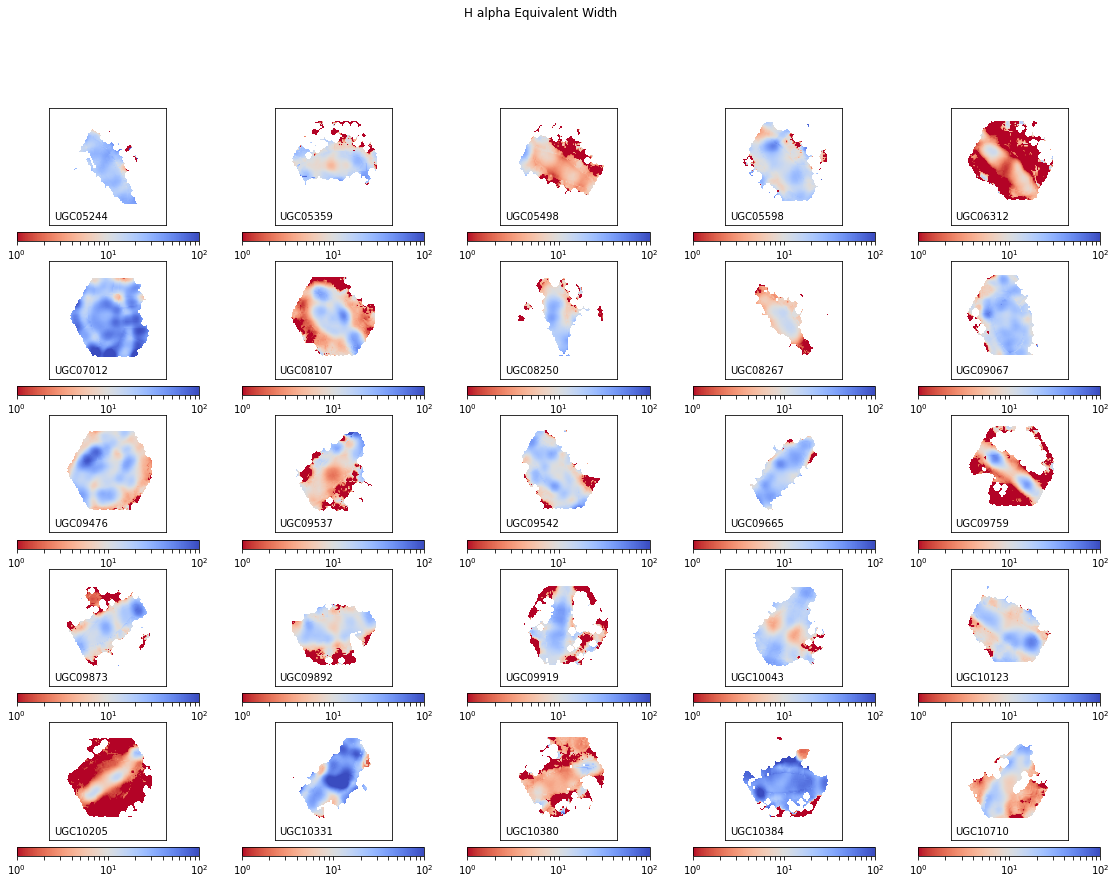

In [12]:
fitspath = '../edge/califa/DR3/edge_blanked/smo7_blanked/'
filelist = glob.glob(fitspath+'flux_elines.*.cube.fits.gz')
clevs = [0.2,0.5]
implots(list=filelist,xrange=50,absvalue=True,slice=198, figtitle='smoothed')

In [7]:
print(re.search('NGC\d{3,5}|IC\d{3,5}|ARP\d{3,5}|UGC\d{3,5}',filelist[0:1][0]))

<_sre.SRE_Match object; span=(57, 63), match='ARP220'>


In [12]:
fitspath = '../edge/califa/DR3/pipe3d_native/flux_elines/halpha/'
filelist = glob.glob(fitspath+'*.havel_felines.fits.gz')
implots(list=filelist,xrange=50,outname='havel_felines.pdf')

Plotting ARP220
Plotting IC0480
Plotting IC0540
Plotting IC0944
Plotting IC1151
Plotting IC1199
Plotting IC1683
Plotting IC2247


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: No contour levels were found within the data range.


Plotting IC2487
Plotting IC4566
Plotting IC5376
Plotting NGC0444
Plotting NGC0447
Plotting NGC0477
Plotting NGC0496
Plotting NGC0523
Plotting NGC0528
Plotting NGC0551
Plotting NGC1167
Plotting NGC2253
Plotting NGC2347
Plotting NGC2410
Plotting NGC2480
Plotting NGC2486
Plotting NGC2487
Plotting NGC2623
Plotting NGC2639
Plotting NGC2730
Plotting NGC2880
Plotting NGC2906
Plotting NGC2916
Plotting NGC2918
Plotting NGC3303
Plotting NGC3381
Plotting NGC3687
Plotting NGC3811
Plotting NGC3815
Plotting NGC3994
Plotting NGC4047
Plotting NGC4149
Plotting NGC4185
Plotting NGC4210
Plotting NGC4211NED02
Plotting NGC4470
Plotting NGC4644
Plotting NGC4676A
Plotting NGC4711
Plotting NGC4961
Plotting NGC5000
Plotting NGC5016
Plotting NGC5056
Plotting NGC5205
Plotting NGC5218
Plotting NGC5394
Plotting NGC5406
Plotting NGC5480
Plotting NGC5485
Plotting NGC5520
Plotting NGC5614
Plotting NGC5633
Plotting NGC5657
Plotting NGC5682
Plotting NGC5732
Plotting NGC5784
Plotting NGC5876
Plotting NGC5908
Plotting NG

In [7]:
fitspath = '../../califa/FIT3D_V2.2/flux_elines/halpha/'
filelist = glob.glob(fitspath+'*.haflux_felines.fits.gz')
implots(list=filelist,xrange=50,outname='haflux_felines.pdf')

In [8]:
fitspath = 'convolve/*.deconv.fits.gz'
filelist = glob.glob(fitspath)
implots(list=filelist,xrange=50,outname='haflux_deconvolved.pdf')

In [9]:
fitspath = '../../califa/FIT3D_V2.2/flux_elines/halpha/'
snrcut = 8
filelist = glob.glob(fitspath+'*.haflux_felines.fits.gz')
for file in filelist:
    gal = os.path.basename(file).split('.')[0]
    print('Working on {}'.format(gal))
    haflux, hdr = fits.getdata(file, header=True)
    eflux = fits.getdata(fitspath+gal+'.e_haflux_felines.fits.gz')
    havel, vhdr = fits.getdata(fitspath+gal+'.havel_felines.fits.gz', header=True)
    bad = np.where(haflux/eflux < snrcut)
    haflux[bad] = np.nan
    havel[bad] = np.nan
    # Outlier removal
    median = np.nanmedian(havel)
    madstd = mad_std(havel, ignore_nan=True)
    outliers = np.where((havel<median-3*madstd)|(havel>median+3*madstd))
    print('Number of outliers: {}'.format(len(outliers[0])))
    havel[outliers] = np.nan
    fits.writeto('hasnr/'+gal+'.hafluxmsk_felines.fits.gz', haflux, hdr, overwrite=True)
    fits.writeto('hasnr/'+gal+'.havelmsk_felines.fits.gz', havel, vhdr, overwrite=True)
plotlist = glob.glob('hasnr/*.havelmsk_felines.fits.gz')
implots(list=plotlist,xrange=50,outname='havelmsk_felines.pdf')
plotlist = glob.glob('hasnr/*.hafluxmsk_felines.fits.gz')
implots(list=plotlist,xrange=50,outname='hafluxmsk_felines.pdf')

In [3]:
fitspath = '../../califa/FIT3D_V2.2/elines/halpha/'
snrcut = 8
filelist = glob.glob(fitspath+'*.haflux.fits.gz')
for file in filelist:
    gal = os.path.basename(file).split('.')[0]
    print('Working on {}'.format(gal))
    haflux, hdr = fits.getdata(file, header=True)
    eflux = fits.getdata(fitspath+gal+'.e_haflux.fits.gz')
    havel, vhdr = fits.getdata(fitspath+gal+'.havel.fits.gz', header=True)
    bad = np.where(haflux/eflux < snrcut)
    haflux[bad] = np.nan
    havel[bad] = np.nan
    # Outlier removal
    median = np.nanmedian(havel)
    madstd = mad_std(havel, ignore_nan=True)
    outliers = np.where((havel<median-3*madstd)|(havel>median+3*madstd))
    print('Number of outliers: {}'.format(len(outliers[0])))
    havel[outliers] = np.nan
    #fits.writeto('hasnr/'+gal+'.hafluxmsk_elines.fits.gz', haflux, hdr, overwrite=True)
    fits.writeto('hasnr/'+gal+'.havelmsk_elines.fits.gz', havel, vhdr, overwrite=True)
plotlist = glob.glob('hasnr/*.havelmsk_elines.fits.gz')
implots(list=plotlist,xrange=50,outname='havelmsk_elines.pdf')
#plotlist = glob.glob('hasnr/*.hafluxmsk_felines.fits.gz')
#implots(list=plotlist,xrange=50,outname='hafluxmsk_felines.pdf')

Working on ARP220
Number of outliers: 184
Working on IC0480
Number of outliers: 203
Working on IC0540
Number of outliers: 163


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


Working on IC0944
Number of outliers: 261
Working on IC1151
Number of outliers: 143
Working on IC1199
Number of outliers: 82
Working on IC1683
Number of outliers: 392
Working on IC2247
Number of outliers: 150
Working on IC2487
Number of outliers: 118
Working on IC4566
Number of outliers: 143
Working on IC5376
Number of outliers: 185
Working on NGC0444
Number of outliers: 417
Working on NGC0447
Number of outliers: 220
Working on NGC0477
Number of outliers: 49
Working on NGC0496
Number of outliers: 204
Working on NGC0523
Number of outliers: 107
Working on NGC0528
Number of outliers: 242
Working on NGC0551
Number of outliers: 80
Working on NGC1167
Number of outliers: 80
Working on NGC2253
Number of outliers: 39
Working on NGC2347
Number of outliers: 53
Working on NGC2410
Number of outliers: 75
Working on NGC2480
Number of outliers: 634
Working on NGC2486
Number of outliers: 124
Working on NGC2487
Number of outliers: 76
Working on NGC2623
Number of outliers: 337
Working on NGC2639
Number o

/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Plotting IC0480
Plotting IC0540
Plotting IC0944
Plotting IC1151
Plotting IC1199
Plotting IC1683
Plotting IC2247
Plotting IC2487
Plotting IC4566
Plotting IC5376
Plotting NGC0444
Plotting NGC0447
Plotting NGC0477
Plotting NGC0496
Plotting NGC0523
Plotting NGC0528
Plotting NGC0551
Plotting NGC1167
Plotting NGC2253
Plotting NGC2347
Plotting NGC2410
Plotting NGC2480
Plotting NGC2486
Plotting NGC2487
Plotting NGC2623
Plotting NGC2639
Plotting NGC2730
Plotting NGC2880
Plotting NGC2906
Plotting NGC2916
Plotting NGC2918
Plotting NGC3303
Plotting NGC3381
Plotting NGC3687
Plotting NGC3811
Plotting NGC3815
Plotting NGC3994
Plotting NGC4047
Plotting NGC4149
Plotting NGC4185
Plotting NGC4210
Plotting NGC4211NED02
Plotting NGC4470
Plotting NGC4644
Plotting NGC4676A
Plotting NGC4711
Plotting NGC4961
Plotting NGC5000
Plotting NGC5016
Plotting NGC5056
Plotting NGC5205
Plotting NGC5218
Plotting NGC5394
Plotting NGC5406
Plotting NGC5480
Plotting NGC5485
Plotting NGC5520
Plotting NGC5614
Plotting NGC5633
P

In [4]:
fitspath = '../../califa/FIT3D_V2.2/flux_elines/halpha/'
fitspath2 = '../../califa/FIT3D_V2.2/elines/halpha/'
snrcut = 8
filelist = glob.glob(fitspath+'*.haflux_felines.fits.gz')
for file in filelist:
    gal = os.path.basename(file).split('.')[0]
    print('Working on {}'.format(gal))
    haflux, hdr = fits.getdata(file, header=True)
    eflux = fits.getdata(fitspath+gal+'.e_haflux_felines.fits.gz')
    havel, vhdr = fits.getdata(fitspath2+gal+'.havel.fits.gz', header=True)
    bad = np.where(haflux/eflux < snrcut)
    haflux[bad] = np.nan
    havel[bad] = np.nan
    # Outlier removal
    median = np.nanmedian(havel)
    madstd = mad_std(havel, ignore_nan=True)
    outliers = np.where((havel<median-3*madstd)|(havel>median+3*madstd))
    print('Number of outliers: {}'.format(len(outliers[0])))
    havel[outliers] = np.nan
    #fits.writeto('hasnr/'+gal+'.hafluxmsk_elines.fits.gz', haflux, hdr, overwrite=True)
    fits.writeto('hasnr/'+gal+'.havelmsk_felines_on_elines.fits.gz', havel, vhdr, overwrite=True)
plotlist = glob.glob('hasnr/*.havelmsk_felines_on_elines.fits.gz')
implots(list=plotlist,xrange=50,outname='havelmsk_felines_on_elines.pdf')
#plotlist = glob.glob('hasnr/*.hafluxmsk_felines.fits.gz')
#implots(list=plotlist,xrange=50,outname='hafluxmsk_felines.pdf')

Working on ARP220
Number of outliers: 23


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


Working on IC0480
Number of outliers: 0
Working on IC0540
Number of outliers: 2
Working on IC0944
Number of outliers: 0
Working on IC1151
Number of outliers: 0
Working on IC1199
Number of outliers: 0
Working on IC1683
Number of outliers: 0
Working on IC2247
Number of outliers: 3
Working on IC2487
Number of outliers: 0
Working on IC4566
Number of outliers: 0
Working on IC5376
Number of outliers: 0
Working on NGC0444
Number of outliers: 0
Working on NGC0447
Number of outliers: 1
Working on NGC0477
Number of outliers: 0
Working on NGC0496
Number of outliers: 0
Working on NGC0523
Number of outliers: 0
Working on NGC0528
Number of outliers: 0
Working on NGC0551
Number of outliers: 0
Working on NGC1167
Number of outliers: 0
Working on NGC2253
Number of outliers: 0
Working on NGC2347
Number of outliers: 0
Working on NGC2410
Number of outliers: 0
Working on NGC2480
Number of outliers: 7
Working on NGC2486
Number of outliers: 2
Working on NGC2487
Number of outliers: 0
Working on NGC2623
Number 

/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Plotting IC1151
Plotting IC1199
Plotting IC1683
Plotting IC2247
Plotting IC2487
Plotting IC4566
Plotting IC5376
Plotting NGC0444
Plotting NGC0447
Plotting NGC0477
Plotting NGC0496
Plotting NGC0523
Plotting NGC0528
Plotting NGC0551
Plotting NGC1167
Plotting NGC2253
Plotting NGC2347
Plotting NGC2410
Plotting NGC2480
Plotting NGC2486
Plotting NGC2487
Plotting NGC2623
Plotting NGC2639
Plotting NGC2730
Plotting NGC2880
Plotting NGC2906
Plotting NGC2916
Plotting NGC2918
Plotting NGC3303
Plotting NGC3381
Plotting NGC3687
Plotting NGC3811
Plotting NGC3815
Plotting NGC3994
Plotting NGC4047
Plotting NGC4149
Plotting NGC4185
Plotting NGC4210
Plotting NGC4211NED02
Plotting NGC4470
Plotting NGC4644
Plotting NGC4676A
Plotting NGC4711
Plotting NGC4961
Plotting NGC5000
Plotting NGC5016
Plotting NGC5056
Plotting NGC5205
Plotting NGC5218
Plotting NGC5394
Plotting NGC5406
Plotting NGC5480
Plotting NGC5485
Plotting NGC5520
Plotting NGC5614
Plotting NGC5633
Plotting NGC5657
Plotting NGC5682
Plotting NGC573